# University Roll No: 17015570011
# Program Name: B.Sc. Hons. Computer Science
# Semester: VI
# Title of the Paper: Lab Based On Machine Learning
# Date of birth: 19/05/1999
# Date: 29th May 2020

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q 1. Compare the performance of Naïve Bayes Classifier and Neural Network (SLP/MLP) on breast cancer dataset. Load the dataset from sklearn.datasets. Comparison should be done in terms of accuracy (Training/Testing). Print Confusion matrix for each classifier. Also draw ROC curve for each classifier. You can use the inbuilt functions from sklearn.

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
del df['Unnamed: 32']
x = df.iloc[:,2:]

y = df['diagnosis']
y = y.map({'M': 0, 'B': 1})
y = y.values


sc = MinMaxScaler()
x = sc.fit_transform(x)
x = np.c_[np.ones(len(x)),x]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [4]:
def evaluateClassifier(x,y,y_pred,y_score):
    cm = pd.DataFrame(
        confusion_matrix(y, y_pred),
        columns=['Predicted Benign', 'Predicted Malignant'],
        index=['True Benign', 'True Malignant']
    )
    print('\nConfusion Matrix: \n')
    cm
    w1 = cm['Predicted Benign']['True Benign'] / (cm['Predicted Benign']['True Benign'] + cm['Predicted Malignant']['True Benign'])
    w2 = cm['Predicted Malignant']['True Malignant'] / (cm['Predicted Benign']['True Malignant'] + cm['Predicted Malignant']['True Malignant'])
    print('\nClasswise accuracy: ')
    print('\nBenign: ',w1 * 100)
    print('\nMalignant: ',w2 * 100)
    print('\nAccuracy of the model:',accuracy_score(y,y_pred) * 100)
    if(y_score.shape[1] == 2):
        fpr,tpr,_ = roc_curve(y, y_score[:,1])
    else:
        fpr,tpr,_ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.5, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC curve')
    plt.show()
    return accuracy_score(y,y_pred) * 100

## Naive Bayes Classifier

## On training data


Confusion Matrix: 


Classwise accuracy: 

Benign:  88.88888888888889

Malignant:  96.45669291338582

Accuracy of the model: 93.71859296482413


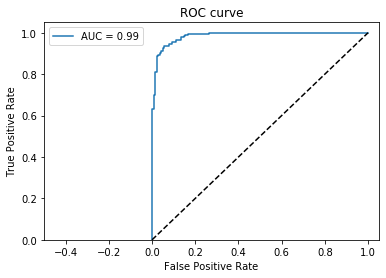

In [5]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
nb_training = evaluateClassifier(x_train,y_train,gnb.predict(x_train),gnb.predict_proba(x_train))

## On testing data


Confusion Matrix: 


Classwise accuracy: 

Benign:  92.64705882352942

Malignant:  95.14563106796116

Accuracy of the model: 94.15204678362574


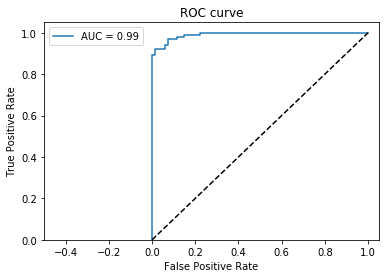

In [6]:
nb_testing = evaluateClassifier(x_test,y_test,gnb.predict(x_test),gnb.predict_proba(x_test))

## Single layer perceptron

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(X,Y,alpha = 0.1,iter = 2500):
    theta = np.random.uniform(size=(X.shape[1], 1))
    Y = Y.reshape(Y.shape[0], 1)
    for i in range(iter):
        z = X @ theta
        Y_pred = sigmoid(z)
        error = Y - Y_pred
        temp = alpha * error
        theta += X.T @ temp
    return theta

## On training data


Confusion Matrix: 


Classwise accuracy: 

Benign:  96.52777777777779

Malignant:  99.60629921259843

Accuracy of the model: 98.49246231155779


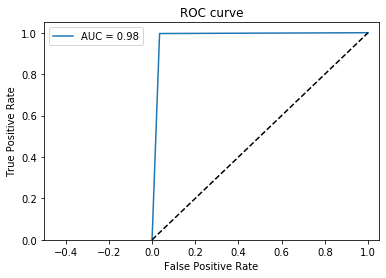

In [8]:
weights = train_perceptron(x_train,y_train)
h_theta = sigmoid(x_train @ weights)
y_probs = h_theta
h_theta[h_theta >=  0.5] = 1
h_theta[h_theta <  0.5] = 0
slp_training = evaluateClassifier(x_train,y_train,h_theta,y_probs)

## On testing data


Confusion Matrix: 


Classwise accuracy: 

Benign:  94.11764705882352

Malignant:  98.05825242718447

Accuracy of the model: 96.49122807017544


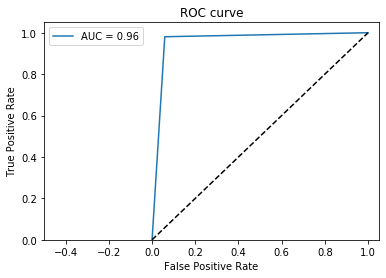

In [9]:
weights = train_perceptron(x_train,y_train)
h_theta = sigmoid(x_test @ weights)
y_probs = h_theta
h_theta[h_theta >=  0.5] = 1
h_theta[h_theta <  0.5] = 0
slp_testing = evaluateClassifier(x_test,y_test,h_theta,y_probs)

## Multi layer perceptron

## On training data


Confusion Matrix: 


Classwise accuracy: 

Benign:  85.41666666666666

Malignant:  98.81889763779527

Accuracy of the model: 93.96984924623115


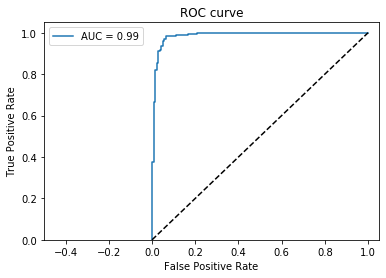

In [10]:
mlp = MLPClassifier(hidden_layer_sizes = 33, max_iter = 70, alpha=0.001, solver='sgd', verbose=False, learning_rate_init=0.01)
mlp.fit(x_train, y_train)
mlp_training = evaluateClassifier(x_train,y_train,mlp.predict(x_train),mlp.predict_proba(x_train))

## On testing data


Confusion Matrix: 


Classwise accuracy: 

Benign:  88.23529411764706

Malignant:  100.0

Accuracy of the model: 95.32163742690058


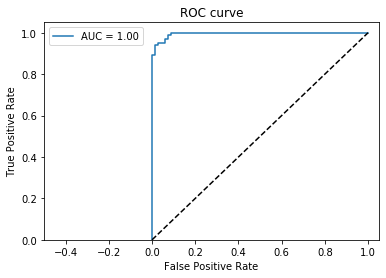

In [11]:
mlp = MLPClassifier(hidden_layer_sizes = 28, max_iter = 70, alpha=0.001, solver='sgd', verbose=False, learning_rate_init=0.01)
mlp.fit(x_train, y_train)
mlp_testing = evaluateClassifier(x_test,y_test,mlp.predict(x_test),mlp.predict_proba(x_test))

## Comparisons of accuracies of the models

## Training accuracies

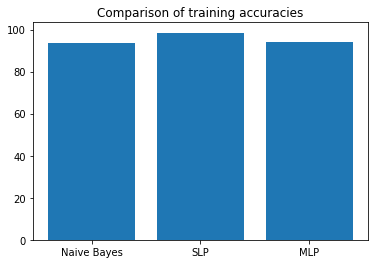

In [12]:
models = ['Naive Bayes', 'SLP', 'MLP']
accuracies = [nb_training,slp_training,mlp_training]
plt.bar(models,accuracies)
plt.title('Comparison of training accuracies')
plt.show()

## Testing accuracies

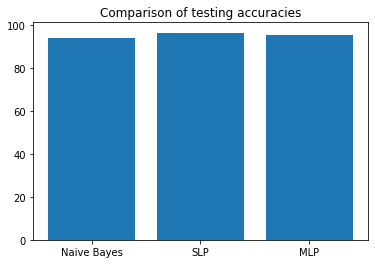

In [13]:
models = ['Naive Bayes', 'SLP', 'MLP']
accuracies = [nb_testing,slp_testing,mlp_testing]
plt.bar(models,accuracies)
plt.title('Comparison of testing accuracies')
plt.show()

# Q 2. Apply linear regression model on given dataset(50_startup.csv). Print the value of co-efficients, training error and testing error. Use inbuilt functions from sklearn.

In [14]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x = pd.get_dummies(x, drop_first=False, prefix_sep='_')
x = (x - np.min(x)) / (np.max(x) - np.min(x)) 
y = (y - np.min(y)) / (np.max(y) - np.min(y))  
x.head()


,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print('The coefficients are: \n',lin_reg.coef_)


The coefficients are: 
 [ 7.78917841e-01 -6.72815348e-02  6.28949526e-02 -6.60204967e-04
  3.73746825e-03 -3.07726329e-03]


## Training Data

In [17]:
Y_pred  = lin_reg.predict(x_train)
print('\nTraining RMSE: ',mean_squared_error(y_train, Y_pred,squared = False))


Training RMSE:  0.05266210409395739


## Testing data

In [18]:
Y_pred  = lin_reg.predict(x_test)
print('\nTesting RMSE: ',mean_squared_error(y_test, Y_pred,squared = False))


Testing RMSE:  0.04663776304850901


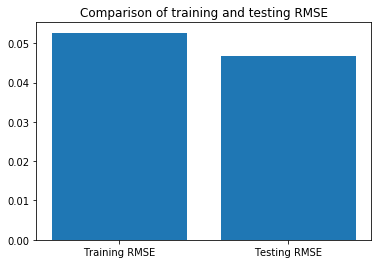

In [19]:
data = ['Training RMSE', 'Testing RMSE']
errors = [mean_squared_error(y_train, lin_reg.predict(x_train),squared = False),mean_squared_error(y_test, lin_reg.predict(x_test),squared = False)]
plt.bar(data,errors)
plt.title('Comparison of training and testing RMSE')
plt.show()